In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
coordinates = list(lat_lngs)

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8e803445d34fddbca72e7d07d2871fc4


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [8]:
#Import the datetime module from the datetime library. 
from datetime import datetime

In [9]:
#Create an empty list to hold the weather data.
city_data = []
#Print the beginning of the logging.
print("Beginning Data Retrieval       ")
print("-------------------------------")

#Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval       
-------------------------------
Processing Record 1 of Set 13 | hamilton
Processing Record 2 of Set 13 | luderitz
Processing Record 3 of Set 13 | vaini
Processing Record 4 of Set 13 | yaan
Processing Record 5 of Set 13 | cape town
Processing Record 6 of Set 13 | barrow
Processing Record 7 of Set 13 | ushuaia
Processing Record 8 of Set 13 | puerto ayora
Processing Record 9 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 13 | rikitea
Processing Record 11 of Set 13 | rockwall
Processing Record 12 of Set 13 | butaritari
Processing Record 13 of Set 13 | albany
Processing Record 14 of Set 13 | banjar
Processing Record 15 of Set 13 | chumikan
Processing Record 16 of Set 13 | kapaa
Processing Record 17 of Set 13 | kuala terengganu
Processing Record 18 of Set 13 | barcelos
Processing Record 19 of Set 13 | lavrentiya
Processing Record 20 of Set 13 | rio gallegos
Processing Record 21 of Set 13 | along
Processing Record 22 of Set 13 | p

Processing Record 33 of Set 16 | thanh hoa
Processing Record 34 of Set 16 | ostrovnoy
Processing Record 35 of Set 16 | bilibino
Processing Record 36 of Set 16 | faya
Processing Record 37 of Set 16 | beringovskiy
Processing Record 38 of Set 16 | khatanga
Processing Record 39 of Set 16 | morrinhos
Processing Record 40 of Set 16 | zhanatas
City not found. Skipping...
Processing Record 41 of Set 16 | ostersund
Processing Record 42 of Set 16 | northam
Processing Record 43 of Set 16 | poum
Processing Record 44 of Set 16 | probolinggo
Processing Record 45 of Set 16 | zarand
Processing Record 46 of Set 16 | samusu
City not found. Skipping...
Processing Record 47 of Set 16 | curillo
Processing Record 48 of Set 16 | nanortalik
Processing Record 49 of Set 16 | havelock
Processing Record 50 of Set 16 | lerici
Processing Record 1 of Set 17 | quatre cocos
Processing Record 2 of Set 17 | itaituba
Processing Record 3 of Set 17 | serenje
Processing Record 4 of Set 17 | camacha
Processing Record 5 of Se

Processing Record 16 of Set 20 | miramar
Processing Record 17 of Set 20 | touros
Processing Record 18 of Set 20 | mabaruma
Processing Record 19 of Set 20 | nome
Processing Record 20 of Set 20 | saint-georges
Processing Record 21 of Set 20 | del rio
Processing Record 22 of Set 20 | maple creek
Processing Record 23 of Set 20 | xichang
Processing Record 24 of Set 20 | erzin
Processing Record 25 of Set 20 | ponta delgada
Processing Record 26 of Set 20 | phan thiet
Processing Record 27 of Set 20 | san vicente
Processing Record 28 of Set 20 | navalcarnero
Processing Record 29 of Set 20 | natchez
Processing Record 30 of Set 20 | shenjiamen
Processing Record 31 of Set 20 | sandomierz
Processing Record 32 of Set 20 | azare
Processing Record 33 of Set 20 | celestun
Processing Record 34 of Set 20 | brebes
Processing Record 35 of Set 20 | aranos
Processing Record 36 of Set 20 | gornopravdinsk
Processing Record 37 of Set 20 | altamira
Processing Record 38 of Set 20 | marquette
Processing Record 39 

Processing Record 4 of Set 24 | nemuro
Processing Record 5 of Set 24 | key west
Processing Record 6 of Set 24 | concarneau
Processing Record 7 of Set 24 | wanning
Processing Record 8 of Set 24 | sao filipe
Processing Record 9 of Set 24 | gohana
Processing Record 10 of Set 24 | kaeo
Processing Record 11 of Set 24 | sibu
Processing Record 12 of Set 24 | longlac
City not found. Skipping...
Processing Record 13 of Set 24 | muros
Processing Record 14 of Set 24 | puerto narino
Processing Record 15 of Set 24 | surt
Processing Record 16 of Set 24 | xuddur
Processing Record 17 of Set 24 | borogontsy
Processing Record 18 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 19 of Set 24 | am timan
Processing Record 20 of Set 24 | shchelyayur
City not found. Skipping...
Processing Record 21 of Set 24 | batsfjord
Processing Record 22 of Set 24 | pathein
Processing Record 23 of Set 24 | turukhansk
Processing Record 24 of Set 24 | kaseda
Processing Record 25 of Set 24 | san juan
Processing Record 

In [16]:
len(city_data)

567

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hamilton,US,2020-06-19 19:06:17,39.18,-84.53,89.01,37,40,6.22
1,Luderitz,NA,2020-06-19 19:10:41,-26.65,15.16,69.80,35,0,3.36
2,Vaini,TO,2020-06-19 19:10:41,-21.20,-175.20,73.40,78,40,9.17
3,Yaan,NG,2020-06-19 19:10:42,7.38,8.57,74.07,85,33,0.69
4,Cape Town,ZA,2020-06-19 19:09:07,-33.93,18.42,66.00,68,0,10.29
5,Barrow,US,2020-06-19 19:06:33,71.29,-156.79,35.60,87,90,10.29
6,Ushuaia,AR,2020-06-19 19:07:28,-54.80,-68.30,37.40,86,90,3.36
7,Puerto Ayora,EC,2020-06-19 19:10:42,-0.74,-90.35,80.60,61,40,18.34
8,Rikitea,PF,2020-06-19 19:10:43,-23.12,-134.97,73.36,87,100,20.18
9,Rockwall,US,2020-06-19 19:10:43,32.90,-96.40,91.99,46,40,12.75


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
import time
#Get today's date in seconds
today = time.strftime("%x")
today

'06/19/20'

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

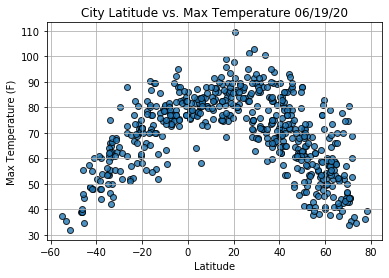

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

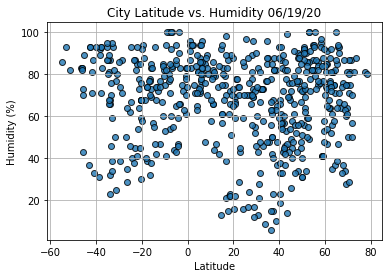

In [22]:
#Build the scatter plots for latitude vs humidity
plt.scatter(lats, 
           humidity, 
           edgecolor="black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure. 
plt.savefig("weather_data/Fig2.png")
#Show plot
plt.show()

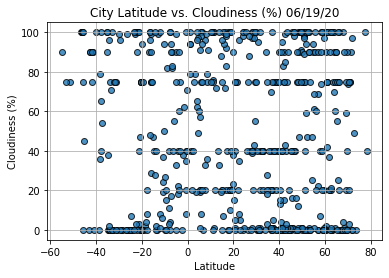

In [23]:
#Build the scatter plots for latitude vs humidity
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure. 
plt.savefig("weather_data/Fig3.png")
#Show plot
plt.show()

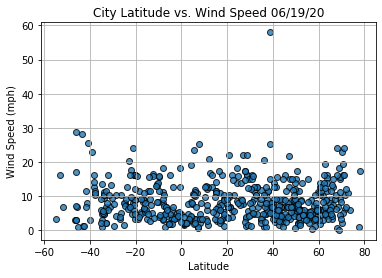

In [24]:
#Build the scatter plots for latitude vs humidity
plt.scatter(lats, 
           wind_speed, 
           edgecolor="black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure. 
plt.savefig("weather_data/Fig2.png")
#Show plot
plt.show()